Step 1: Load and Prepare Data

1. Upload and Read CSV Files:

In [50]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions (2).csv
Saving Products.csv to Products (2).csv
Saving Customers.csv to Customers (2).csv


Upload Customers.csv, Products.csv, and Transactions.csv.

In [2]:
import pandas as pd

# Read the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview data
print("Customers Data:\n", customers.head())
print("Products Data:\n", products.head())
print("Transactions Data:\n", transactions.head())


Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

2. Merge Datasets: Combine Transactions.csv with Products.csv and Customers.csv for analysis.

In [3]:
# Merge transactions with products
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# Merge the result with customers
merged_data = pd.merge(transactions_products, customers, on="CustomerID", how="left")

# Preview the merged dataset
print("Merged Dataset:\n", merged_data.head())


Merged Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins   

Step 2: Perform EDA

1. Basic Dataset Overview:

In [4]:
# Check missing values
print("Missing Values:\n", merged_data.isnull().sum())

# Check data types
print("\nData Types:\n", merged_data.dtypes)

# Check for duplicates
print("\nDuplicates in Merged Data:", merged_data.duplicated().sum())


Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

Data Types:
 TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
ProductName         object
Category            object
Price_y            float64
CustomerName        object
Region              object
SignupDate          object
dtype: object

Duplicates in Merged Data: 0


2. Descriptive Statistics:

In [5]:
# Summary statistics for numeric columns
print("\nSummary Statistics:\n", merged_data.describe())

# View categorical distributions
print("\nCategory-wise Breakdown:\n", merged_data["Category"].value_counts())
print("\nRegion-wise Breakdown:\n", merged_data["Region"].value_counts())



Summary Statistics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000

Category-wise Breakdown:
 Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

Region-wise Breakdown:
 Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


3. Example EDA Analyses:
   -Sales by Region:

In [6]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)


Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


Top-Selling Products:

In [7]:
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_products)


Top-Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


Monthly Sales Trend:

In [8]:
# Convert TransactionDate to datetime
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])

# Extract month and year
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")

monthly_sales = merged_data.groupby("Month")["TotalValue"].sum()
print("Monthly Sales Trend:\n", monthly_sales)


Monthly Sales Trend:
 Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


Customer Lifetime Value:

In [9]:
customer_ltv = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Lifetime Value:\n", customer_ltv)


Top 10 Customers by Lifetime Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


Product Category Analysis:

In [10]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("Category-Wise Sales:\n", category_sales)


Category-Wise Sales:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


Step 3: Visualize Key Insights


1. Region-Wise Sales (Bar Plot):

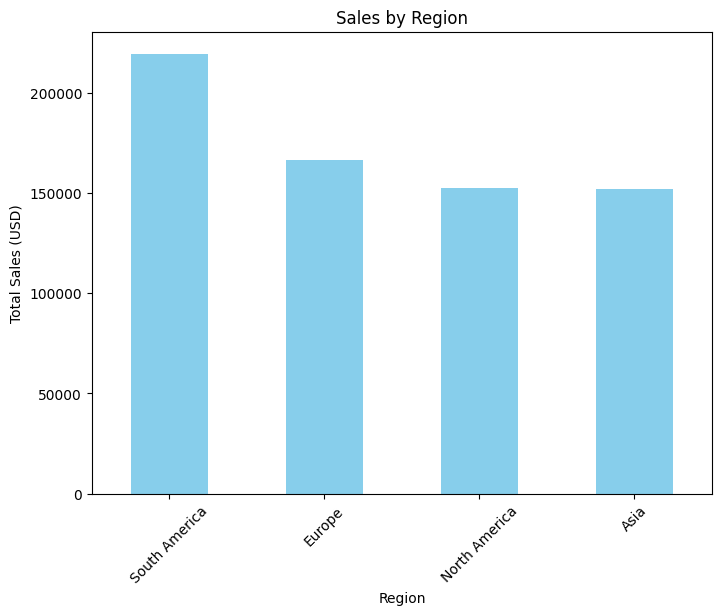

In [11]:
import matplotlib.pyplot as plt

region_sales.plot(kind="bar", color="skyblue", figsize=(8, 6))
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


2. Monthly Sales Trend (Line Plot):

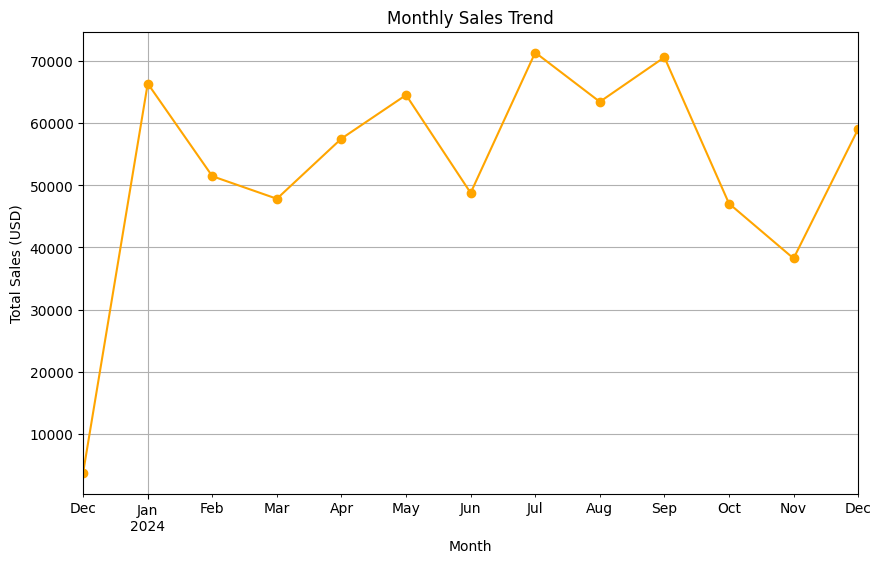

In [12]:
monthly_sales.plot(kind="line", figsize=(10, 6), marker="o", color="orange")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()


3. Top-Selling Products (Horizontal Bar Plot):

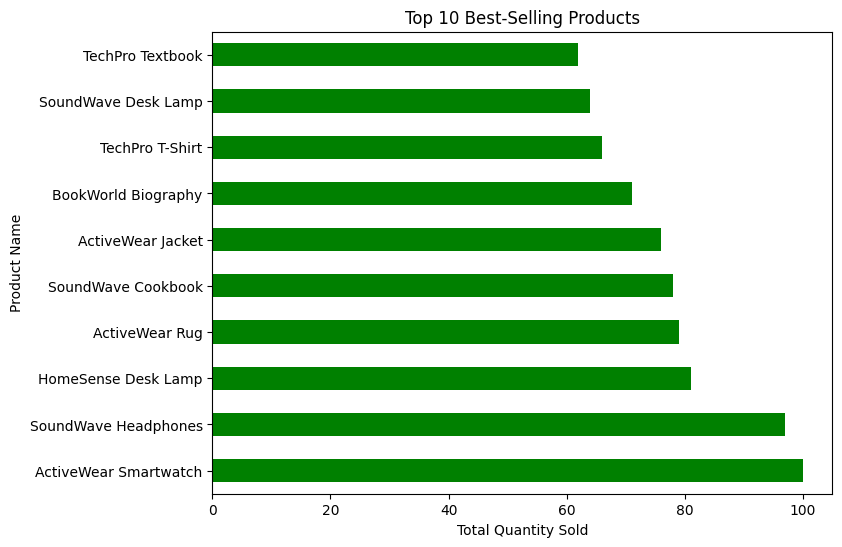

In [13]:
top_products.plot(kind="barh", color="green", figsize=(8, 6))
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


4. Category-Wise Sales Distribution (Pie Chart):

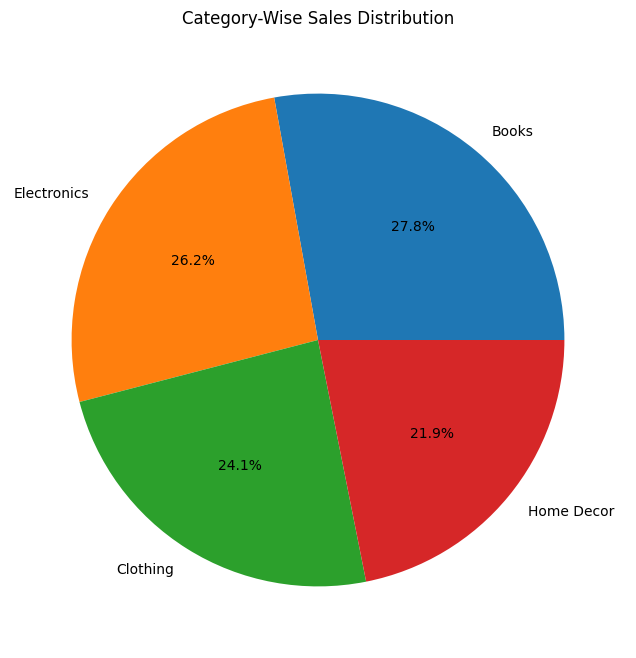

In [14]:
category_sales.plot(kind="pie", autopct="%.1f%%", figsize=(8, 8))
plt.title("Category-Wise Sales Distribution")
plt.ylabel("")
plt.show()


Step 4: Detailed Report PDF (/content/Rahul_Sharma_Business_Insights_Report.pdf)
Step 5: Save and Export Deliverables

Task 2: Lookalike Model

Step 1: Import Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


Step 2: Load the Data

In [18]:
# Load the data
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")


Step 3: Merge the Data

In [19]:
# Merge customers with transactions
customer_transactions = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")


In [20]:
# Merge transactions with products
customer_transactions = pd.merge(customer_transactions, products_df, on="ProductID", how="left")


Step 4: Create a Customer-Product Interaction Matrix

In [21]:
# Create a customer-product interaction matrix
customer_product_matrix = customer_transactions.pivot_table(
    index="CustomerID", columns="ProductName", values="TotalValue", aggfunc="sum", fill_value=0
)


Step 5: Normalize the Customer-Product Matrix

In [22]:
# Normalize the matrix (optional, for better similarity calculation)
scaler = StandardScaler()
customer_product_matrix_scaled = pd.DataFrame(scaler.fit_transform(customer_product_matrix), columns=customer_product_matrix.columns)


Step 6: Compute Cosine Similarity

In [23]:
# Compute cosine similarity between customers
cosine_sim = cosine_similarity(customer_product_matrix_scaled)
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_product_matrix.index, columns=customer_product_matrix.index)


Step 7: Generate Recommendations for Lookalikes

In [24]:
# Function to get the top 3 lookalikes for a customer
def get_top_lookalikes(customer_id, num_recommendations=3):
    sim_scores = cosine_sim_df[customer_id]  # Get the similarity scores for the given customer
    sim_scores = sim_scores.drop(customer_id)  # Remove self similarity (since a customer is always most similar to themselves)
    top_lookalikes = sim_scores.nlargest(num_recommendations)  # Get the top N similar customers
    return top_lookalikes


Step 8: Get Lookalikes for the First 20 Customers

In [27]:
# Corrected code to ensure proper DataFrame construction and handling recommendations
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming the customer_product_matrix and cosine_sim_df are already created

# Function to get the top 3 lookalikes for a given customer_id
def get_top_lookalikes(customer_id, top_n=3):
    # Ensure the customer_id exists in the similarity matrix
    if customer_id in cosine_sim_df.index:
        # Get the similarity scores for the given customer
        similarity_scores = cosine_sim_df.loc[customer_id].sort_values(ascending=False)

        # Exclude the customer themselves (similarity score 1 with themselves)
        lookalikes = similarity_scores[similarity_scores < 1].head(top_n)

        # Return the list of top lookalikes and their similarity scores
        return list(zip(lookalikes.index, lookalikes.values))
    else:
        # If the customer_id is not found in the similarity matrix, return an empty list
        return []

# Collect recommendations for the first 20 customers
lookalike_recommendations = {}

for i in range(1, 21):  # CustomerID: C0001 to C0020
    customer_id = f"C00{i}"  # Generate CustomerID in the format C0001, C0002, ...

    # Check if the customer_id exists in the similarity matrix
    if customer_id in cosine_sim_df.index:
        lookalike_recommendations[customer_id] = get_top_lookalikes(customer_id)
    else:
        print(f"Customer ID {customer_id} not found in similarity matrix.")

# Convert the recommendations into a list of tuples (CustomerID, Lookalike_CustomerID, Similarity_Score)
recommendations_list = []
for customer_id, lookalikes in lookalike_recommendations.items():
    for lookalike, score in lookalikes:
        recommendations_list.append([customer_id, lookalike, score])

# Create a DataFrame from the recommendations list
lookalike_df = pd.DataFrame(recommendations_list, columns=['CustomerID', 'Lookalike_CustomerID', 'Similarity_Score'])

# Save the lookalike recommendations to a CSV file
lookalike_df.to_csv('/content/Lookalike.csv', index=False)

# Display the first few recommendations
print(lookalike_df.head())



Customer ID C001 not found in similarity matrix.
Customer ID C002 not found in similarity matrix.
Customer ID C003 not found in similarity matrix.
Customer ID C004 not found in similarity matrix.
Customer ID C005 not found in similarity matrix.
Customer ID C006 not found in similarity matrix.
Customer ID C007 not found in similarity matrix.
Customer ID C008 not found in similarity matrix.
Customer ID C009 not found in similarity matrix.
  CustomerID Lookalike_CustomerID  Similarity_Score
0      C0010                C0092          0.785553
1      C0010                C0083          0.682416
2      C0010                C0029          0.517407
3      C0011                C0094          0.548237
4      C0011                C0120          0.504136


Step 9: Prepare the Output CSV (Lookalike.csv)

In [28]:
# Convert the recommendations to a DataFrame
lookalike_df = pd.DataFrame.from_dict(lookalike_recommendations, orient='index')

# Rename columns to show the lookalikes (1, 2, 3)
lookalike_df.columns = [f"Lookalike_{i+1}" for i in range(3)]  # Top 3 recommendations

# Save the lookalikes to a CSV file
lookalike_df.to_csv("Lookalike.csv")


Task 3: Customer Segmentation / Clustering

Step 1: Data Loading and Preprocessing

In [43]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect the columns in both datasets
print("Customers Columns:", customers.columns)
print("Transactions Columns:", transactions.columns)


Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


Step 2: Merge the datasets based on a common column

In [45]:
# Check the columns of the customers dataset
print("Customers Columns:", customers.columns)

# Check the columns of the transactions dataset
print("Transactions Columns:", transactions.columns)


Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


Step 3: merge

In [46]:
# Merge datasets on the 'CustomerID' column
data = pd.merge(customers, transactions, on='CustomerID', how='inner')

# Inspect the merged data
print(data.head())


  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


Step 4: Data Preprocessing

In [47]:
# Check for missing values in the merged data
print(data.isnull().sum())

# Handle missing values if any (for simplicity, we can drop rows with missing values)
data = data.dropna()

# Encode categorical features (e.g., 'Region' and 'CustomerName') using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Region', 'CustomerName'], drop_first=True)

# Convert 'SignupDate' to datetime and extract relevant features (like year, month)
data_encoded['SignupDate'] = pd.to_datetime(data_encoded['SignupDate'])
data_encoded['SignupYear'] = data_encoded['SignupDate'].dt.year
data_encoded['SignupMonth'] = data_encoded['SignupDate'].dt.month

# Drop 'SignupDate' as it's no longer needed
data_encoded = data_encoded.drop(columns=['SignupDate'])

# Scale numerical features for clustering (e.g., 'Quantity', 'TotalValue', 'Price')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = data_encoded.copy()

# List of numerical columns to scale
numerical_cols = ['Quantity', 'TotalValue', 'Price', 'SignupYear', 'SignupMonth']
data_scaled[numerical_cols] = scaler.fit_transform(data_scaled[numerical_cols])

# Check the preprocessed data
print(data_scaled.head())


CustomerID         0
CustomerName       0
Region             0
SignupDate         0
TransactionID      0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
  CustomerID TransactionID ProductID      TransactionDate  Quantity  \
0      C0001        T00015      P054  2024-01-19 03:12:55 -0.480571   
1      C0001        T00932      P022  2024-09-17 09:01:18  0.414347   
2      C0001        T00085      P096  2024-04-08 00:01:00 -0.480571   
3      C0001        T00445      P083  2024-05-07 03:11:44 -0.480571   
4      C0001        T00436      P029  2024-11-02 17:04:16  0.414347   

   TotalValue     Price  Region_Europe  Region_North America  \
0   -1.167373 -1.530249          False                 False   
1   -0.562745 -0.959820          False                 False   
2   -0.152274  0.248219          False                 False   
3    0.449270  1.302134          False                 False   
4    1.239454  1.145166       